In [2]:
#basic imports
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
sns.set_palette('viridis')
mpl.rcParams['figure.figsize'] = 6,4

# Modelling imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

-------------------------


In [3]:
df = pd.read_csv('data\Student_performance_data _.csv')
df.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [4]:
df.shape

(2392, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [92]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [93]:
df.duplicated().sum()

0

In [94]:
df.nunique()

StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

In [11]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [5]:
# Target Variable would be GPA
df.drop(['GradeClass','StudentID'], axis=1, inplace=True)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


# 3. Exploratory Data Analysis

In [54]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA'],
      dtype='object')

## 3.1 Categorical Columns

In [55]:
# Identify categorical columns: columns that are not numerical
categorical_feature = [feature for feature in df.columns if len(df[feature].unique()) <= 5]
print("Categorical Variables Count: {}".format(len(categorical_feature)))

Categorical Variables Count: 10


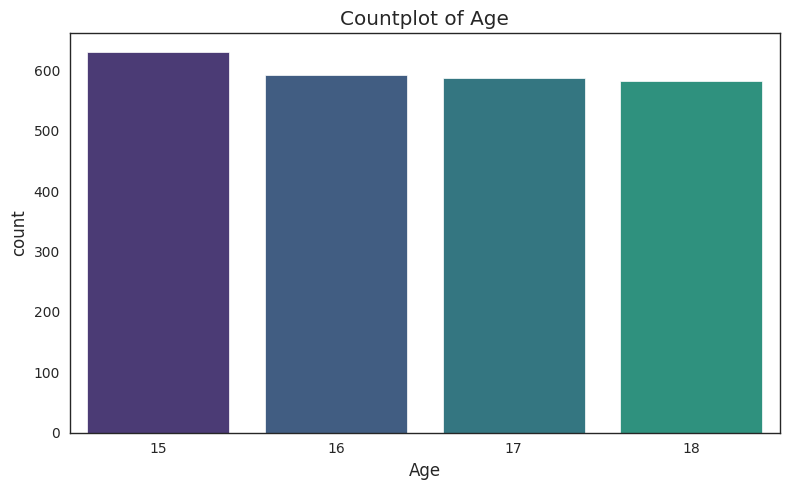

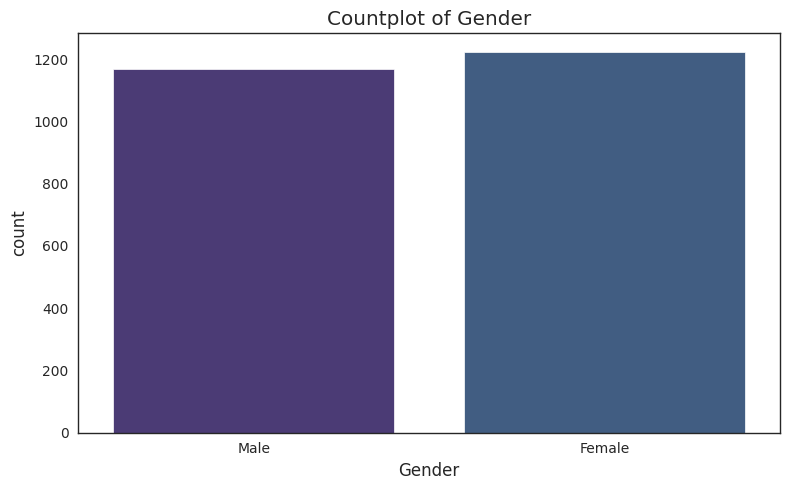

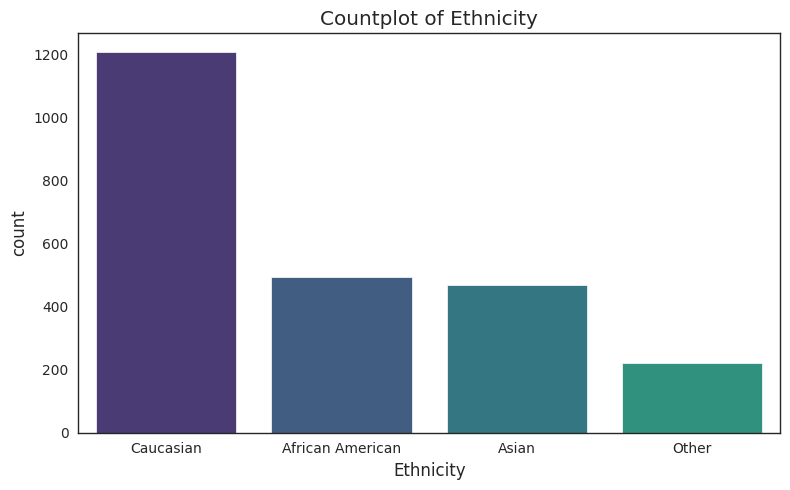

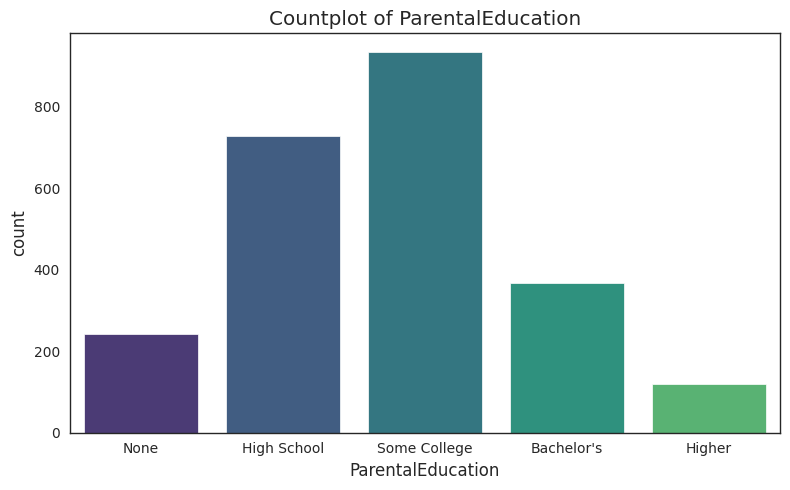

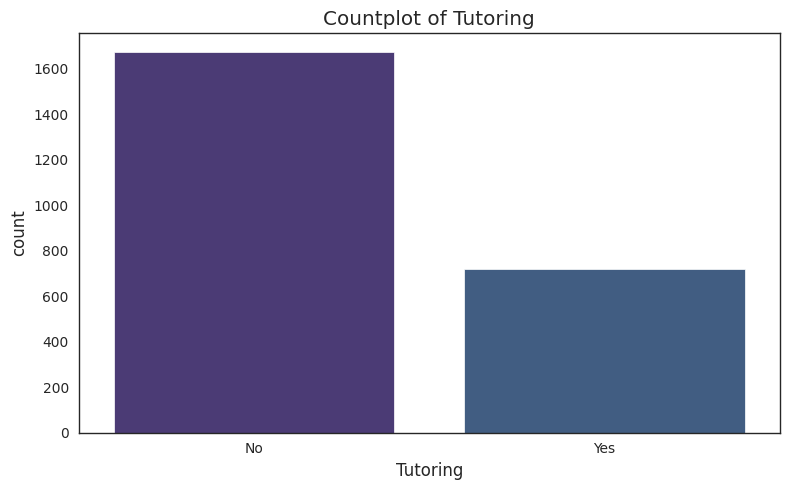

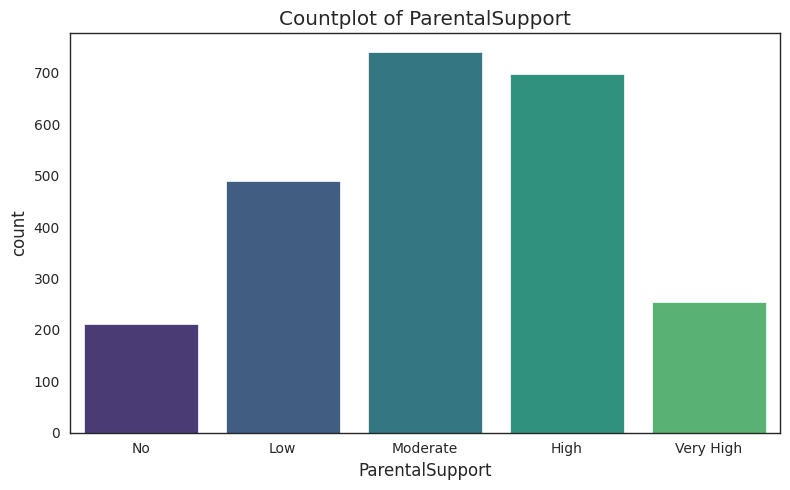

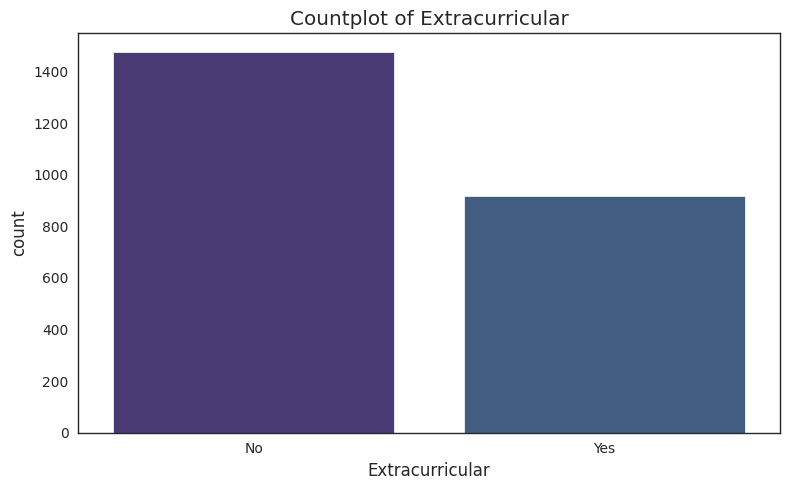

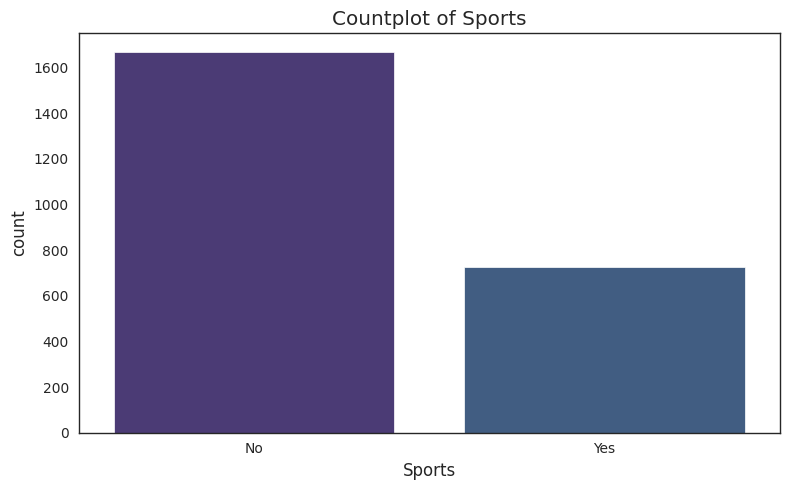

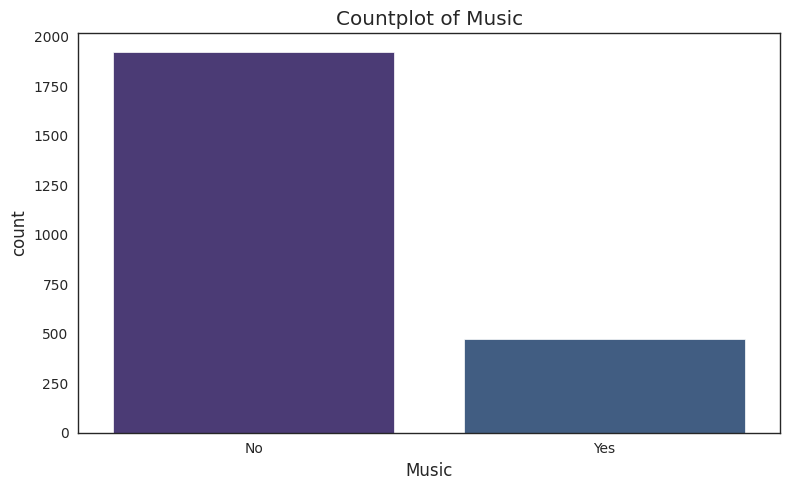

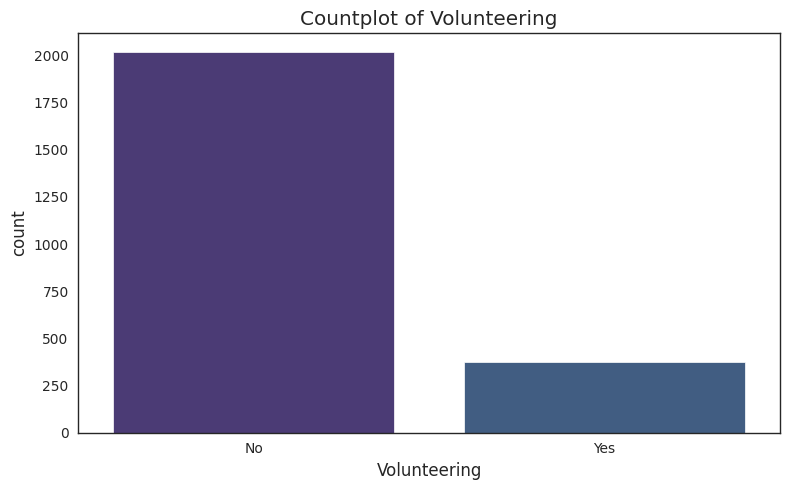

In [56]:
# Custom labels for the categorical columns
custom_labels = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Age': [15, 16, 17, 18],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female']
}

# Plot countplots for each categorical column
for column in categorical_feature:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    
    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.tight_layout()
    plt.show()

## 3.2 Numerical Columns - Discrete

In [59]:
discrete_feature = [feature for feature in df.columns if len(df[feature].unique()) < 25 and feature not in categorical_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


## 3.3 Numerical Variables EDA - Continuous

In [60]:
continuous_feature=[feature for feature in df.columns if feature not in discrete_feature+categorical_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [61]:
continuous_feature

['StudyTimeWeekly', 'Absences', 'GPA']

In [62]:
df[continuous_feature].head()

,StudyTimeWeekly,Absences,GPA
0,19.833723,7,2.929196
1,15.408756,0,3.042915
2,4.210570,26,0.112602
3,10.028829,14,2.054218
4,4.672495,17,1.288061


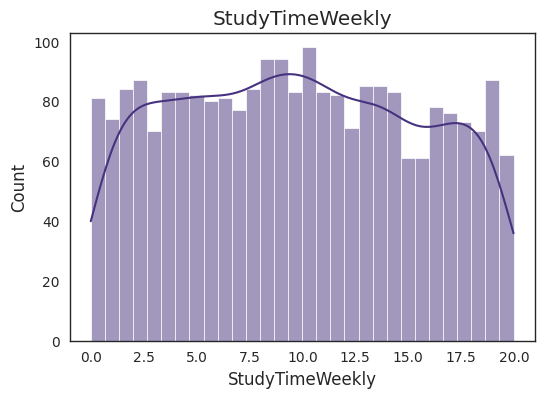

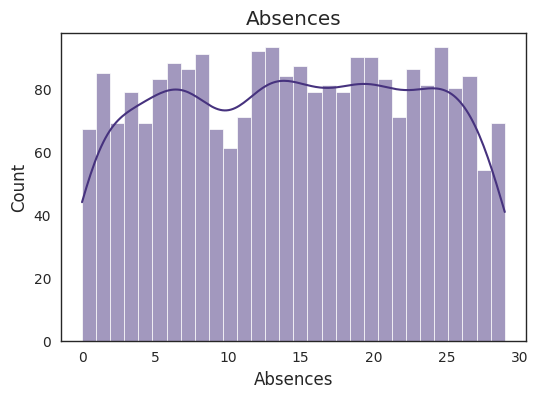

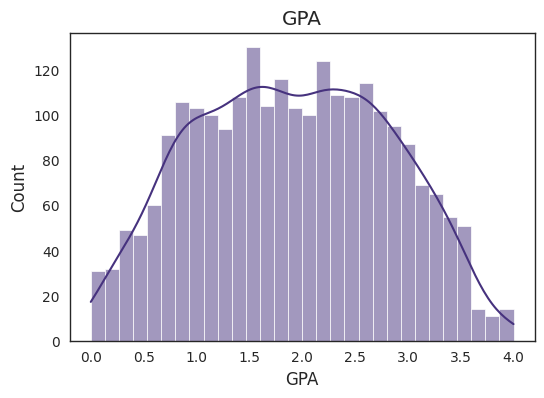

In [64]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data = df.copy()
    sns.histplot(data = data, x = data[feature], bins = 30, kde = True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

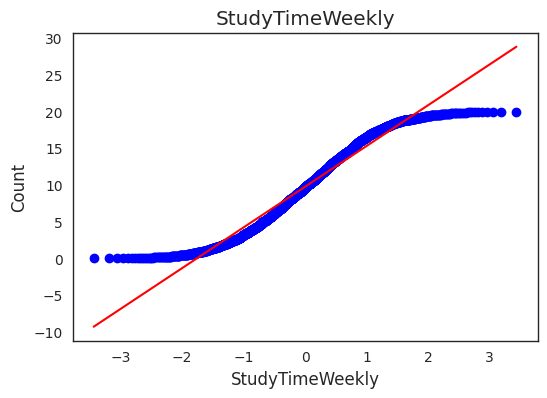

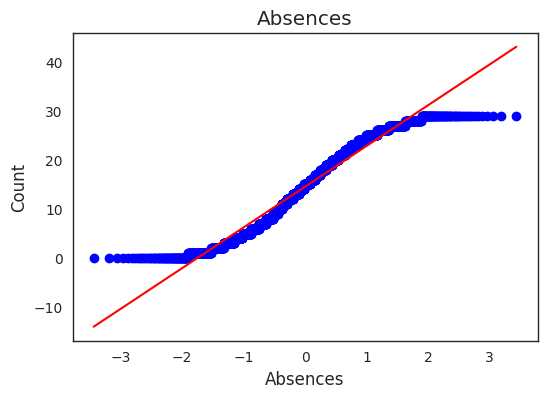

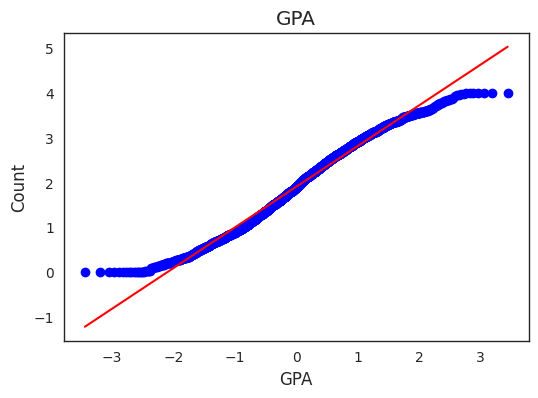

In [66]:
for feature in continuous_feature:
    data = df.copy()
    stats.probplot(df[feature], dist = "norm", plot = plt)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## 3.4 Outlier Detection

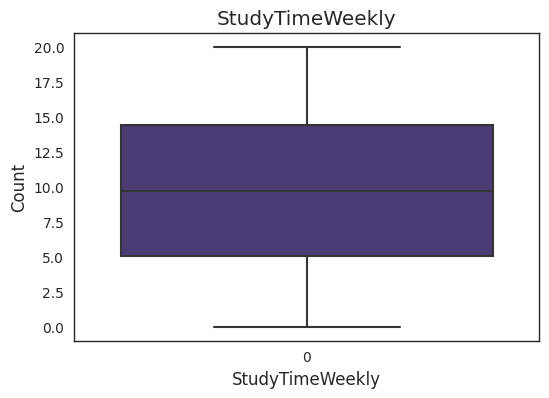

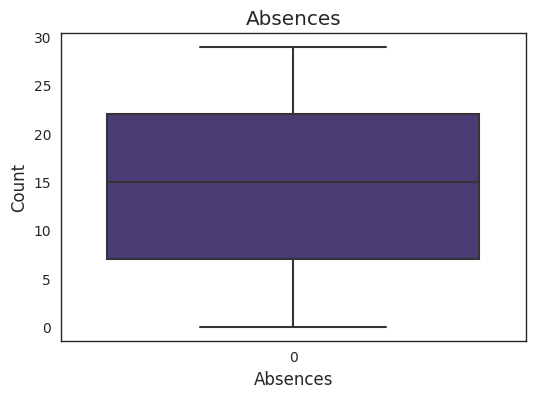

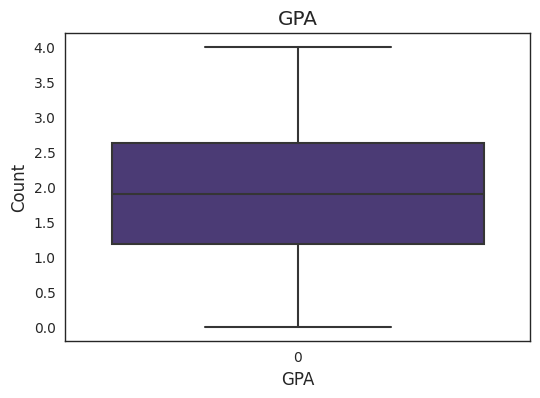

In [65]:
for feature in continuous_feature:
    data = df.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## 3.5 Finding Correlation

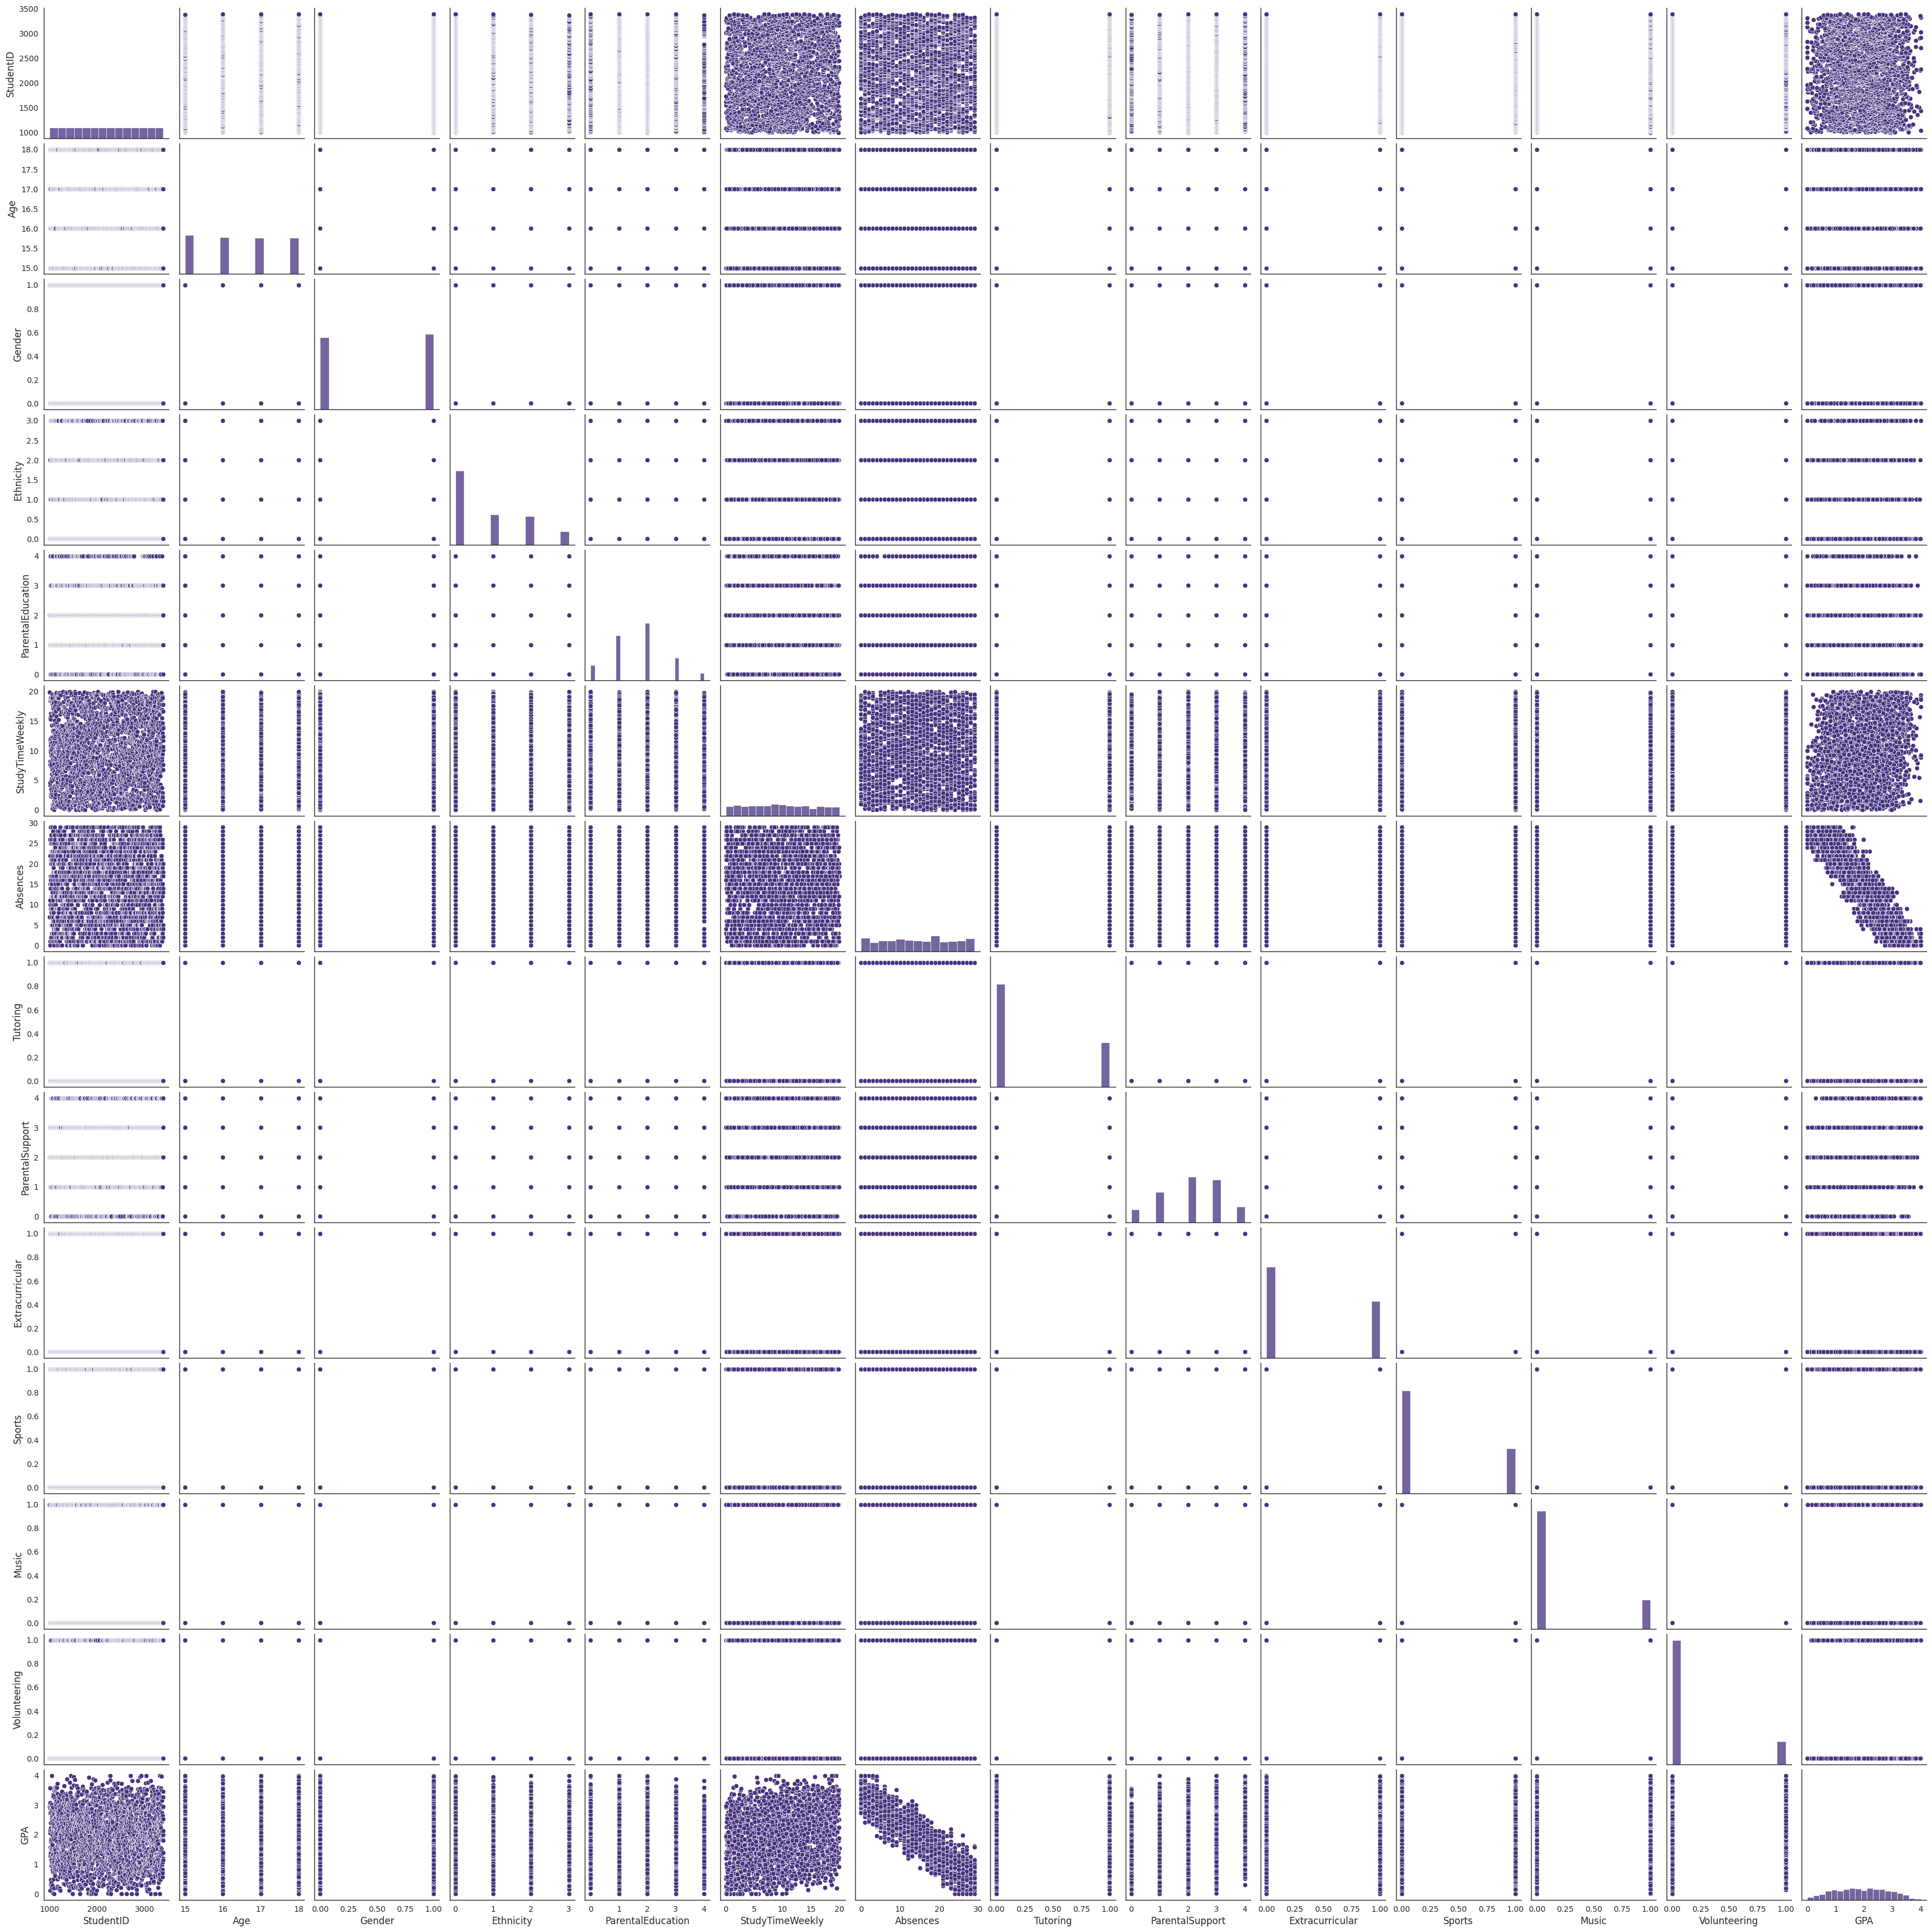

In [31]:
sns.pairplot(df)
plt.show()

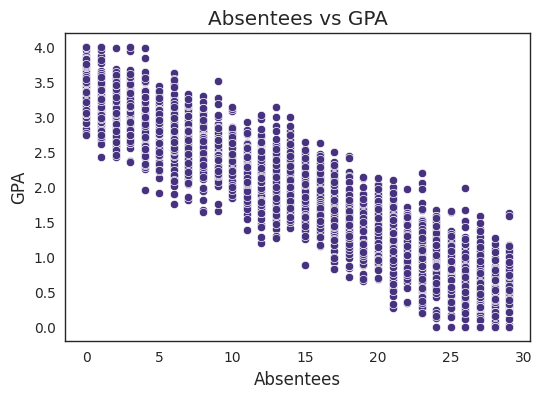

In [32]:
sns.scatterplot(x = df['Absences'], y = df['GPA'], data = df)
plt.xlabel('Absentees')
plt.ylabel('GPA')
plt.title('Absentees vs GPA')
plt.show()

In [68]:
df_corr = df.corr(numeric_only = True)
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

df_corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
Age,1.000,0.045,-0.028,0.025,-0.007,-0.012,-0.012,0.033,-0.025,-0.046,-0.003,0.013,0.000
Gender,0.045,1.000,0.016,0.007,0.011,0.021,-0.032,0.008,-0.006,-0.009,0.007,-0.000,-0.013
Ethnicity,-0.028,0.016,1.000,0.034,0.007,-0.026,-0.017,0.021,-0.009,-0.004,-0.015,0.013,0.028
ParentalEducation,0.025,0.007,0.034,1.000,-0.011,0.037,-0.017,-0.017,0.007,0.002,0.039,0.012,-0.036
StudyTimeWeekly,-0.007,0.011,0.007,-0.011,1.000,0.009,0.029,0.036,-0.023,0.007,0.008,-0.017,0.179
Absences,-0.012,0.021,-0.026,0.037,0.009,1.000,-0.016,0.002,0.000,0.041,-0.009,-0.019,-0.919
Tutoring,-0.012,-0.032,-0.017,-0.017,0.029,-0.016,1.000,-0.001,0.005,0.006,-0.011,-0.051,0.145
ParentalSupport,0.033,0.008,0.021,-0.017,0.036,0.002,-0.001,1.000,-0.008,-0.006,0.035,-0.006,0.191
Extracurricular,-0.025,-0.006,-0.009,0.007,-0.023,0.000,0.005,-0.008,1.000,-0.012,-0.014,-0.007,0.094
Sports,-0.046,-0.009,-0.004,0.002,0.007,0.041,0.006,-0.006,-0.012,1.000,-0.020,-0.003,0.058


In [71]:
# Calculate the correlation with the Grade Class and find the strongest correlation
gpa_class_corr = df.corr(numeric_only=True)['GPA'].drop('GPA')
strongest_positive_correlation = gpa_class_corr.idxmax()
strongest_positive_correlation_value = gpa_class_corr.max()
strongest_negative_correlation = gpa_class_corr.idxmin()
strongest_negative_correlation_value = gpa_class_corr.min()

print(f"The strongest positive correlation with the GPA is {strongest_positive_correlation} with a value of {strongest_positive_correlation_value:.2f}")
print(f"The strongest negative correlation with the GPA is {strongest_negative_correlation} with a value of {strongest_negative_correlation_value:.2f}")

The strongest positive correlation with the GPA is ParentalSupport with a value of 0.19
The strongest negative correlation with the GPA is Absences with a value of -0.92


## 3.6 Asking Basic Questions

In [33]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


In [34]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000


### 1. Total number of students

In [43]:
total_students = df['StudentID'].nunique()
print(f'Number of students: {total_students}')

Number of students: 2392


#### 2. Number of students with FUll GPA (4.0)

In [41]:
full_gpa = df[df['GPA'] == 4]['GPA'].count()
print(f'Number of students with full GPA: {full_gpa}')

Number of students with full GPA: 7


### 3. Number of Students with less than 1 GPA

In [42]:
less_than_1gpa = df[df['GPA'] <= 1]['GPA'].count()
print(f'Number of students with less than 1 GPA: {less_than_1gpa}')

Number of students with less than 1 GPA: 468


### 4. Number of Students with greater than 1 but less than 2 GPA

In [48]:
less_than_2gpa = df[(df['GPA'] > 1) & (df['GPA'] <= 2)]['GPA'].count()
print(f'Number of students with less than 2 GPA (but greater than 1 GPA): {less_than_2gpa}')

Number of students with less than 2 GPA (but greater than 1 GPA): 806


### 5. Visualizing GPA scores based on gender

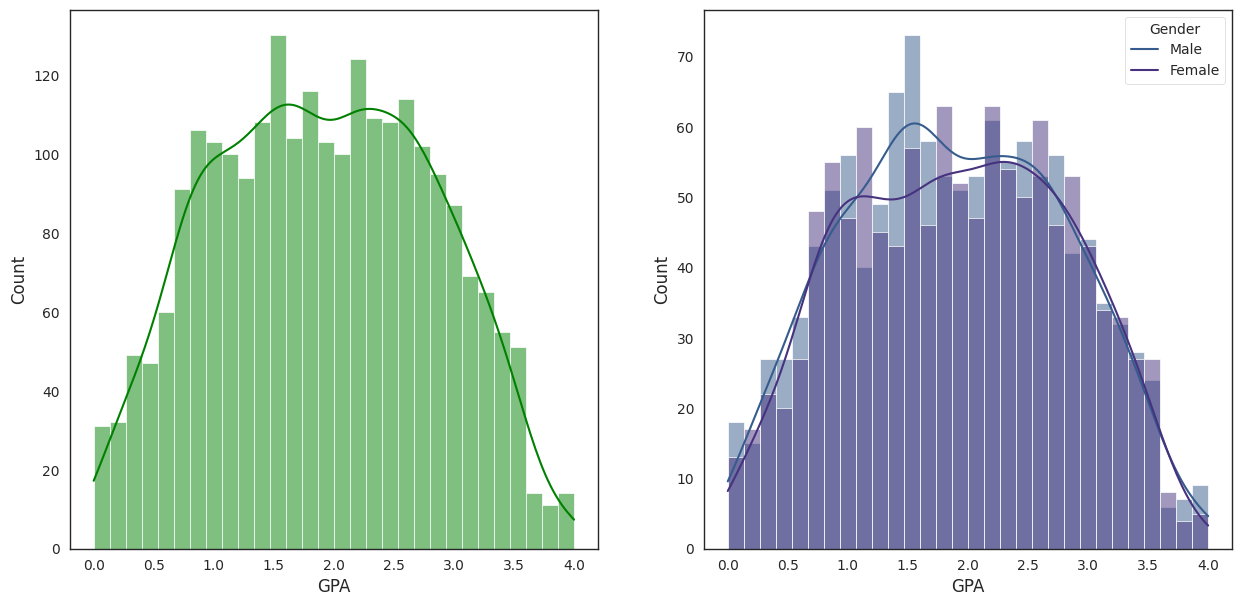

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='GPA',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='GPA',bins=30,kde=True,hue='Gender', legend = False)
# Directly set custom labels
labels = custom_labels['Gender']
plt.legend(title='Gender', loc='upper right', labels=labels)
plt.show()

# 4. Feature Engineering

## 4.1 Log-transform - Absences and StudyTimeWeekly

In [133]:
data = df.copy()

In [98]:
continuous_feature

['StudyTimeWeekly', 'Absences', 'GPA']

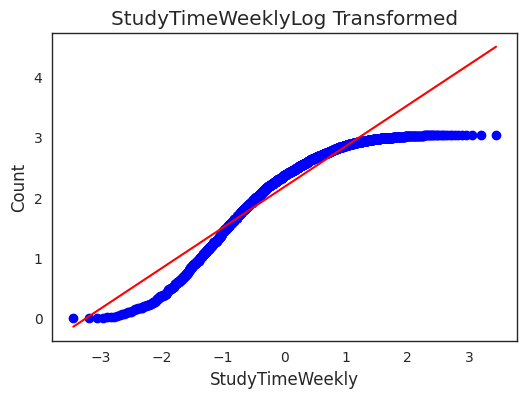

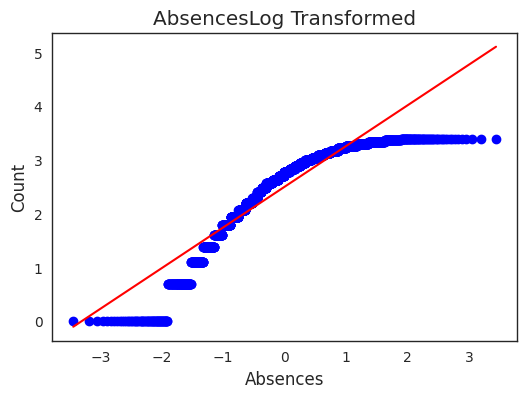

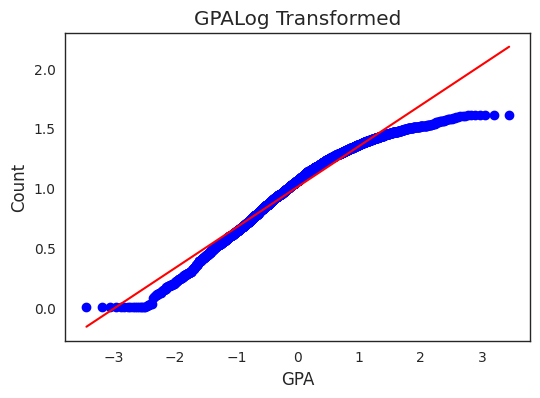

In [131]:
for feature in continuous_feature:
    data1 = df.copy()
    data1[feature] = np.log1p(data1[feature])
    #stats.probplot(df[feature], dist = "norm", plot = plt)
    stats.probplot(data1[feature], dist = "norm", plot = plt)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature + 'Log Transformed')
    plt.show()

# 5. Modelling

In [132]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA'],
      dtype='object')

## 5.1 Train-Test-Split

In [6]:
X = df.drop('GPA', axis = 1)
y = df['GPA']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape

((1913, 12), (479, 12))

In [9]:
y_train.shape, y_test.shape

((1913,), (479,))

## 5.2 Feature Scaling

In [10]:
sc = StandardScaler()

In [11]:
preprocessor = ColumnTransformer([
    ('sscaler', sc, X.columns),
])

In [12]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_train_scaled.shape

(1913, 12)

In [13]:
X_test_scaled = preprocessor.transform(X_test)
X_test_scaled.shape

(479, 12)

## 5.3 Creating functions for Training and Evaluation

In [145]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [146]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1962
- Mean Absolute Error: 0.1592
- R2 Score: 0.9541
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1966
- Mean Absolute Error: 0.1553
- R2 Score: 0.9532


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.9163
- Mean Absolute Error: 0.7736
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9097
- Mean Absolute Error: 0.7660
- R2 Score: -0.0008


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1962
- Mean Absolute Error: 0.1592
- R2 Score: 0.9541
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1967
- Mean Absolute Error: 0.1553
- R2 Score: 0.9532


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3600
- Mean Absolute Error: 0.2908
- R2 Score: 0.8456
----------------------

In [147]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.953247
2,Ridge,0.953233
7,CatBoosting Regressor,0.944883
6,XGBRegressor,0.930452
5,Random Forest Regressor,0.927846
8,AdaBoost Regressor,0.916603
4,Decision Tree,0.869025
3,K-Neighbors Regressor,0.742481
1,Lasso,-0.000774


## 5.4 Best Model - Linear Regression

In [14]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train_scaled, y_train)
y_pred = lin_model.predict(X_test_scaled)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 95.32


## 5.5 Making New Predictions

In [16]:
X_test.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
1004,15,1,2,4,0.135763,17,0,2,0,1,1,1
196,16,1,0,4,1.989925,0,0,1,1,0,0,1
2342,15,0,0,0,10.588715,15,0,3,0,0,0,1
1708,18,1,1,2,16.208658,1,0,3,1,0,0,0
435,18,0,0,0,3.576821,27,0,1,0,1,0,0


In [17]:
X_test_scaled[0]

array([-1.29521279,  0.97165101,  1.09241643,  2.26211643, -1.6860694 ,
        0.28074613, -0.65799605, -0.12577352, -0.78293347,  1.51039849,
        2.01183831,  2.3233582 ])

In [18]:
lin_model.predict([[-1.29521279,  0.97165101,  1.09241643,  2.26211643, -1.6860694 ,
        0.28074613, -0.65799605, -0.12577352, -0.78293347,  1.51039849,
        2.01183831,  2.3233582 ]])

array([1.47962878])

In [157]:
y_test

1004    1.427724
196     3.117354
2342    2.037769
1708    3.548521
435     0.248977
          ...   
986     1.562360
120     2.174903
283     2.332540
1740    2.777967
1726    0.863545
Name: GPA, Length: 479, dtype: float64